In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

df=pd.read_csv('1997.csv')

In [2]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1997,1,28,2,1615.0,1615,1728.0,1725,WN,1159,...,4,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1997,1,29,3,1624.0,1615,1735.0,1725,WN,1159,...,4,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1997,1,30,4,1626.0,1615,1730.0,1725,WN,1159,...,2,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1997,1,31,5,1628.0,1615,1729.0,1725,WN,1159,...,4,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1997,1,14,2,1503.0,1425,1619.0,1535,WN,1221,...,4,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411838,1997,12,6,6,1349.0,0,1621.0,0,AA,870,...,9,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5411839,1997,12,7,7,1336.0,0,1620.0,0,AA,870,...,20,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5411840,1997,12,8,1,1335.0,0,1616.0,0,AA,870,...,13,16,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5411841,1997,12,9,2,1334.0,0,1614.0,0,AA,870,...,17,13,0,NaN,0,NaN,NaN,NaN,NaN,NaN


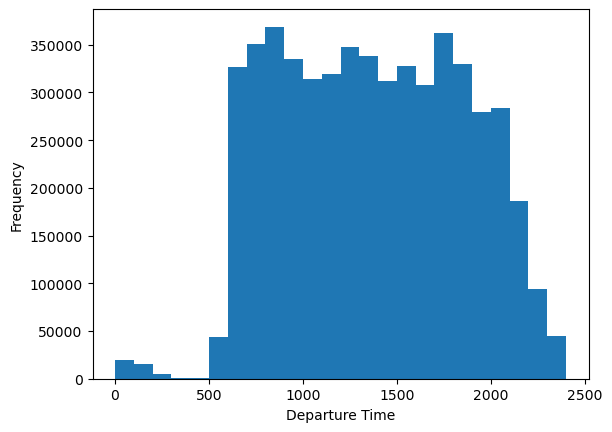

In [3]:
plt.hist(df['DepTime'], bins=24)
plt.xlabel('Departure Time')
plt.ylabel('Frequency')
plt.show()

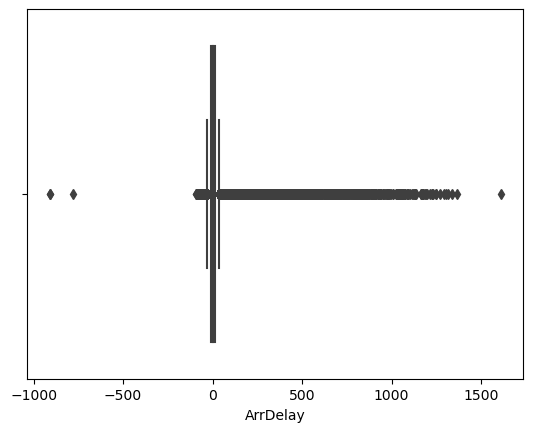

In [4]:
import seaborn as sns

sns.boxplot(x='ArrDelay', data=df)
plt.show()

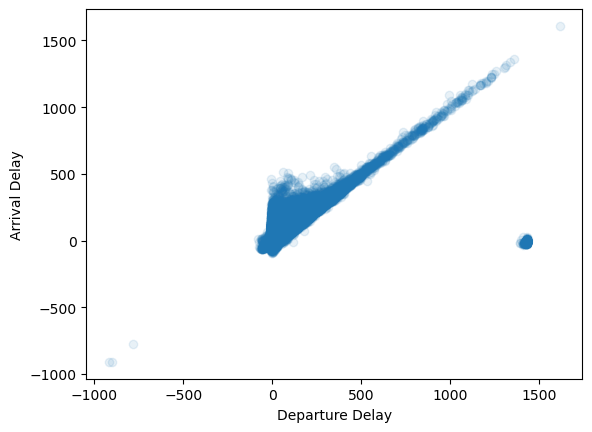

In [5]:
plt.scatter(x='DepDelay', y='ArrDelay', data=df, alpha=0.1)
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.show()

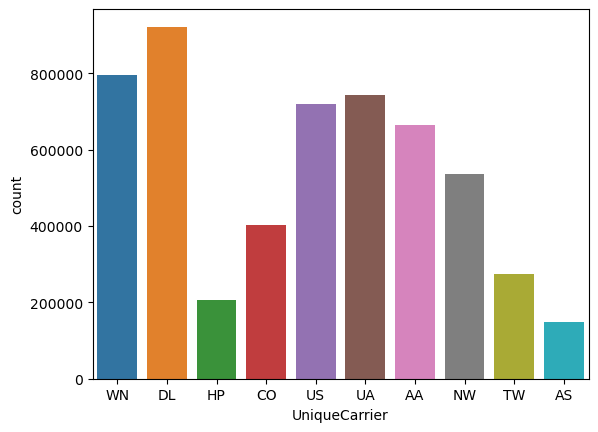

In [6]:
sns.countplot(x='UniqueCarrier', data=df)
plt.show()

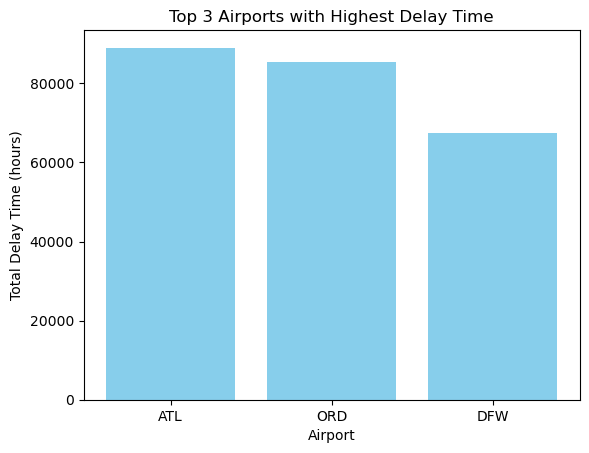

In [7]:
# create a new dataframe with the sum of arrival and departure delay time for each airport
delay_by_airport = df.groupby(['Origin'])[['ArrDelay', 'DepDelay']].sum()

# calculate the total delay time for each airport in hours
delay_by_airport['TotalDelay'] = (delay_by_airport['ArrDelay'] + delay_by_airport['DepDelay']) / 60

# sort the airports by total delay time in descending order and select the top 3
top_airports = delay_by_airport.sort_values(by='TotalDelay', ascending=False).head(3)

# plot the bar chart
fig, ax = plt.subplots()
ax.bar(top_airports.index, top_airports['TotalDelay'], color='skyblue')
ax.set_xlabel('Airport')
ax.set_ylabel('Total Delay Time (hours)')
ax.set_title('Top 3 Airports with Highest Delay Time')
plt.show()

UniqueCarrier
DL    9.520654
AS    9.512581
HP    9.284964
Name: ArrDelay, dtype: float64


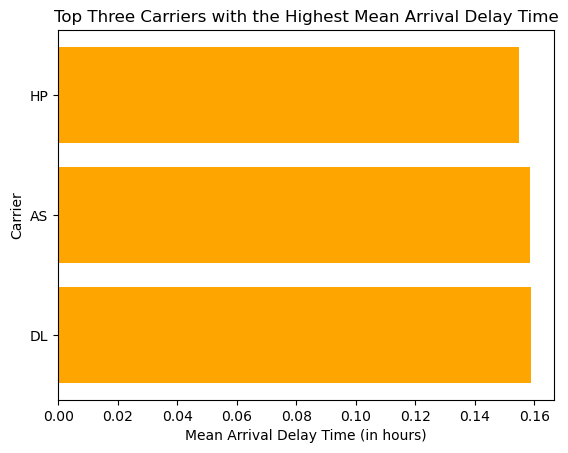

In [8]:
# Calculate the mean delay time for each carrier
carrier_delays = df.groupby('UniqueCarrier')['ArrDelay'].mean()

# Sort the result in descending order
carrier_delays = carrier_delays.sort_values(ascending=False)

# Select the top three carriers
top_carriers = carrier_delays.head(3)

print(top_carriers)

# Plot the top three carriers with the highest mean arrival delay time
plt.barh(top_carriers.index, top_carriers.values/60, color='orange')

# Set the title and labels for the plot
plt.title('Top Three Carriers with the Highest Mean Arrival Delay Time')
plt.xlabel('Mean Arrival Delay Time (in hours)')
plt.ylabel('Carrier')

# Show the plot
plt.show()

In [9]:
# Calculate total arrival and departure delay times for each carrier
carrier_arrival_delays = df.groupby('UniqueCarrier')['ArrDelay'].sum()
carrier_departure_delays = df.groupby('UniqueCarrier')['DepDelay'].sum()

# Combine the arrival and departure delays into a single DataFrame
carrier_delays = pd.concat([carrier_arrival_delays, carrier_departure_delays], axis=1)

# Calculate the total delay time for each carrier
carrier_delays['TotalDelay'] = carrier_delays['ArrDelay'] + carrier_delays['DepDelay']

# Sort the result in descending order
carrier_delays = carrier_delays.sort_values('TotalDelay', ascending=False)

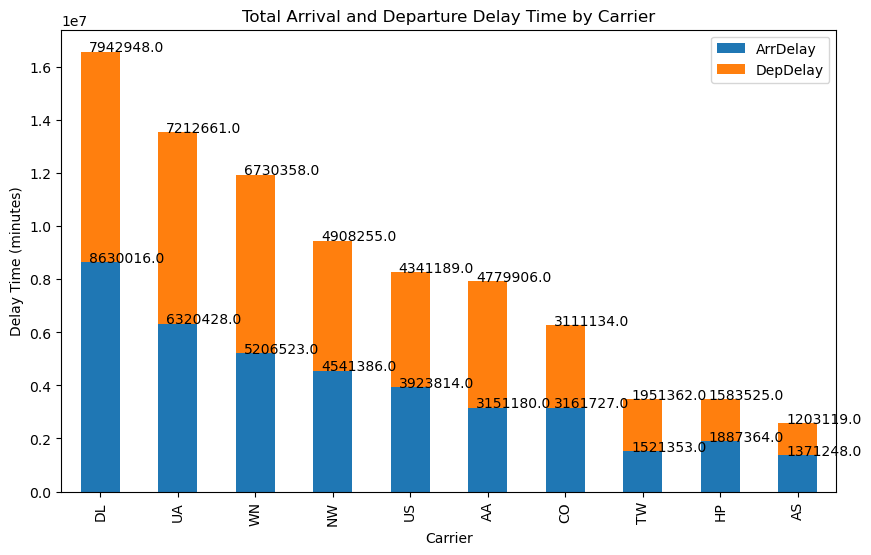

In [10]:
# Plot the total delay time for arrivals and departures for each carrier
ax = carrier_delays[['ArrDelay', 'DepDelay']].plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the plot title and axis labels
ax.set_title('Total Arrival and Departure Delay Time by Carrier')
ax.set_xlabel('Carrier')
ax.set_ylabel('Delay Time (minutes)')

# Add the total delay time for each carrier to the top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_y() + p.get_height() + 10000))

plt.show()

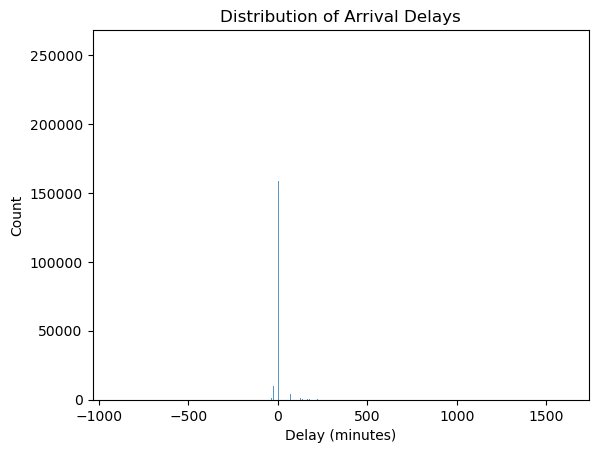

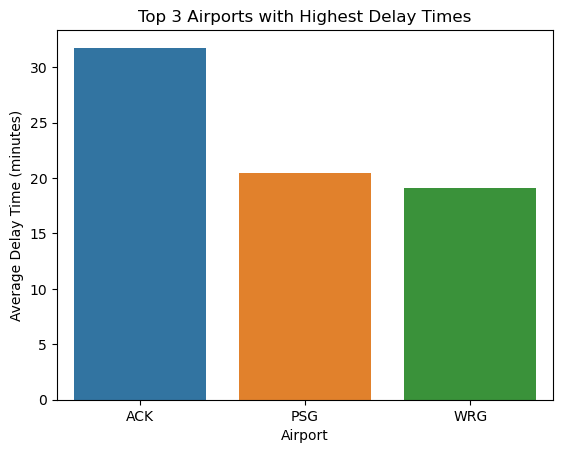

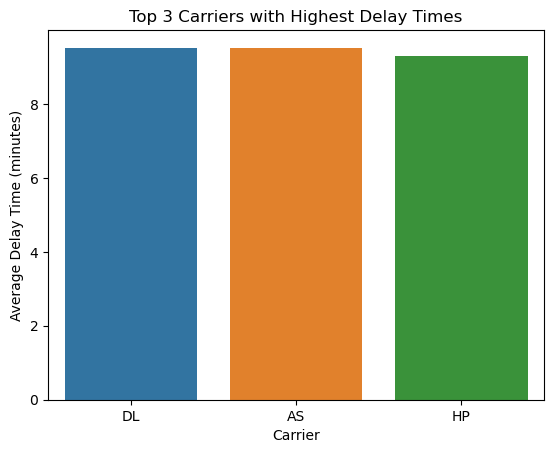

In [11]:
# Histogram of arrival delays
sns.histplot(df['ArrDelay'], kde=False)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Count')
plt.show()

# Bar chart of top 3 airports with highest delay times
top_airports = df.groupby('Dest')['ArrDelay'].mean().sort_values(ascending=False)[:3]
sns.barplot(x=top_airports.index, y=top_airports.values)
plt.title('Top 3 Airports with Highest Delay Times')
plt.xlabel('Airport');
plt.ylabel('Average Delay Time (minutes)')
plt.show()

# Bar chart of top 3 carriers with highest delay times
top_carriers = df.groupby('UniqueCarrier')['ArrDelay'].mean().sort_values(ascending=False)[:3]
sns.barplot(x=top_carriers.index, y=top_carriers.values)
plt.title('Top 3 Carriers with Highest Delay Times')
plt.xlabel('Carrier')
plt.ylabel('Average Delay Time (minutes)')
plt.show()

<AxesSubplot: xlabel='ArrDelay', ylabel='Count'>

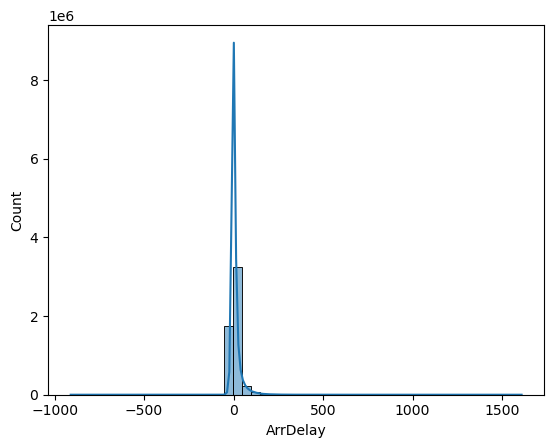

In [12]:
sns.histplot(df, x='ArrDelay', bins=50, kde=True)

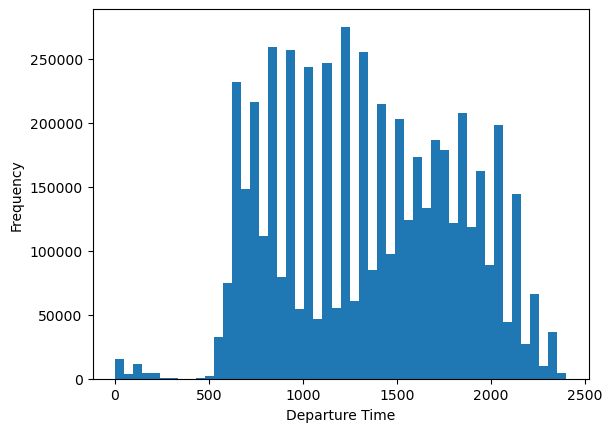

In [13]:
plt.hist(df['DepTime'], bins=50)
plt.xlabel('Departure Time')
plt.ylabel('Frequency')
plt.show()

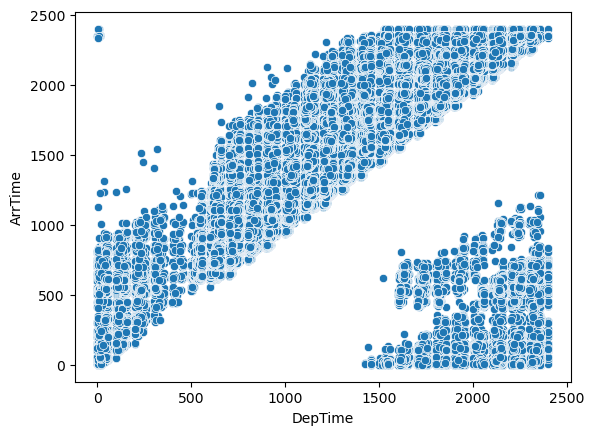

C:\Users\lenovo\AppData\Local\Temp\ipykernel_46328\2563754896.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


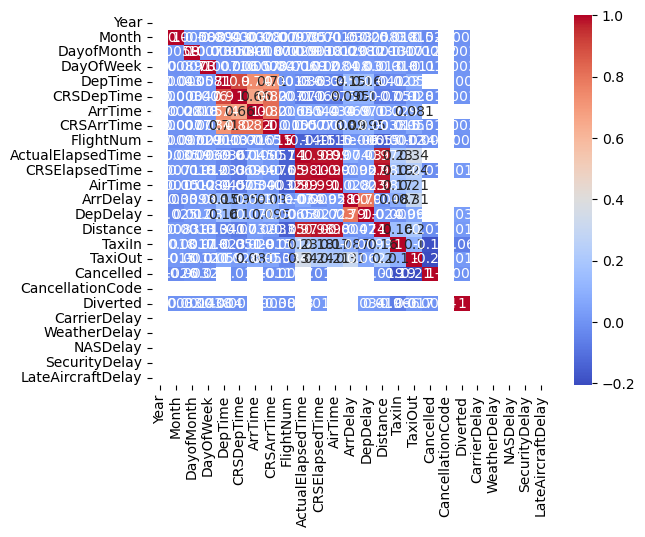

In [14]:
sns.scatterplot(x='DepTime', y='ArrTime', data=df)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot: xlabel='Month', ylabel='DepDelay'>

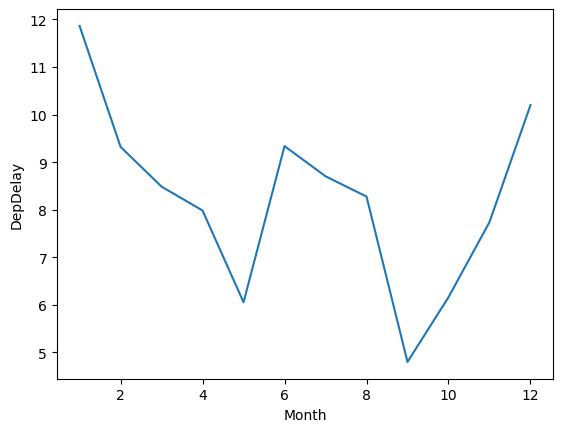

In [15]:
# Compute the average departure delay by month
delay_by_month = df.groupby('Month')['DepDelay'].mean().reset_index()

# Create a line plot using Seaborn
sns.lineplot(x='Month', y='DepDelay', data=delay_by_month)